In [132]:
import pandas as pd
from pathlib import Path
import numpy as np

In [133]:
csv_path = Path('../logs/rodi/rodi_resnet18_cross-entropy_b128/predictions/rodi_resnet18_cross-entropy_b128_aug-02.csv')
df = pd.read_csv(csv_path)
df

,y_true,y_pred,Baetidae,Capniidae,Chironomidae,Heptageniidae,Perlolidae,Rhyacophilidae,Salmonidae,Simulidae
0,Salmonidae,Salmonidae,4.480416e-05,7.442923e-06,5.725565e-06,4.255385e-04,1.009732e-03,0.000024,9.984750e-01,8.213211e-06
1,Salmonidae,Salmonidae,5.453826e-06,4.687471e-09,1.326965e-09,1.215635e-03,6.446872e-07,0.000009,9.987693e-01,2.456083e-08
2,Salmonidae,Salmonidae,5.830866e-07,3.260511e-09,2.875474e-10,1.305720e-04,1.103339e-07,0.000002,9.998662e-01,6.337051e-09
3,Salmonidae,Salmonidae,2.478231e-07,1.657758e-07,9.914057e-09,4.144487e-06,5.753919e-08,0.000002,9.999938e-01,2.226773e-08
4,Salmonidae,Salmonidae,2.938219e-06,3.348382e-07,3.686656e-08,8.495359e-05,1.407247e-06,0.000084,9.998265e-01,1.746153e-07
...,...,...,...,...,...,...,...,...,...,...
4597,Chironomidae,Chironomidae,1.515491e-04,4.223070e-04,9.990712e-01,7.119810e-07,4.708255e-09,0.000001,9.878262e-07,3.521165e-04
4598,Chironomidae,Chironomidae,2.980114e-03,3.133674e-02,9.613254e-01,9.226090e-05,2.034929e-06,0.000065,2.090446e-05,4.177544e-03
4599,Chironomidae,Capniidae,3.601413e-03,9.734356e-01,2.110099e-02,3.959904e-04,1.918979e-05,0.000889,2.967562e-05,5.281136e-04
4600,Chironomidae,Chironomidae,7.107098e-05,1.332384e-04,9.920407e-01,3.903986e-06,4.596520e-08,0.000002,2.784569e-06,7.746324e-03


In [134]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [135]:
def classification_reportX(*args, figsize=None, **kwargs):
    """Extends classification report by adding an useful plot for the performance across classes"""
    r = classification_report(*args, **kwargs, output_dict=True)
    rdf0 = pd.DataFrame(r)
    rdf = rdf0.T.iloc[:-3,:].sort_values('support',ascending=False)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    xbar = range(len(rdf))
    ax1.bar(xbar,rdf['support'], alpha=0.2)
    ax2.plot(rdf['f1-score'], 'ro', label='f1-score')
    ax2.plot(rdf['precision'], 'g*', label='precision', alpha=0.5)
    ax2.plot(rdf['recall'], 'b*', label='recall', alpha=0.5)

    ax2.vlines(xbar, rdf['f1-score'], rdf['precision'], 'g')
    ax2.vlines(xbar, rdf['f1-score'], rdf['recall'], 'b')

    ax2.hlines(rdf0['weighted avg']['f1-score'], 0,len(rdf), color='r', linestyle='--', label='weighted f1-score')
    ax2.hlines(rdf0['macro avg']['f1-score'], 0,len(rdf), color='r', linestyle='-.', label='macro f1-score')
    ax2.hlines(rdf0['accuracy']['recall'], 0,len(rdf), color='b', linestyle='--', label='accuracy')

    fig.legend()
    return classification_report(*args, **kwargs)

def confusion_matrixX(y_true, y_pred, classes, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(cm)
    mask[cm==0] = 1
    sns.heatmap(cm*100, 
                annot=True, 
                fmt='.0f', 
                cmap="YlGnBu",
                xticklabels=classes, 
                yticklabels=classes,
                mask=mask,
                square=True, 
                cbar=False,
                ax=ax)
    ax.set_ylabel('True label', size=18)
    ax.set_xlabel('Predicted label', size=18)

                precision    recall  f1-score   support

      Baetidae       0.87      0.91      0.89      1301
     Capniidae       0.94      0.86      0.90       732
  Chironomidae       0.63      0.82      0.72       236
 Heptageniidae       0.88      0.92      0.90      1294
    Perlolidae       0.80      0.74      0.77       238
Rhyacophilidae       0.98      0.87      0.92       519
    Salmonidae       0.92      0.95      0.94       129
     Simulidae       0.66      0.43      0.52       153

      accuracy                           0.87      4602
     macro avg       0.83      0.81      0.82      4602
  weighted avg       0.87      0.87      0.87      4602



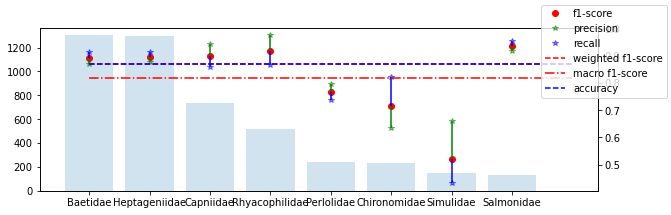

In [136]:
print(classification_reportX(df.y_true, df.y_pred, figsize=(10,3)))

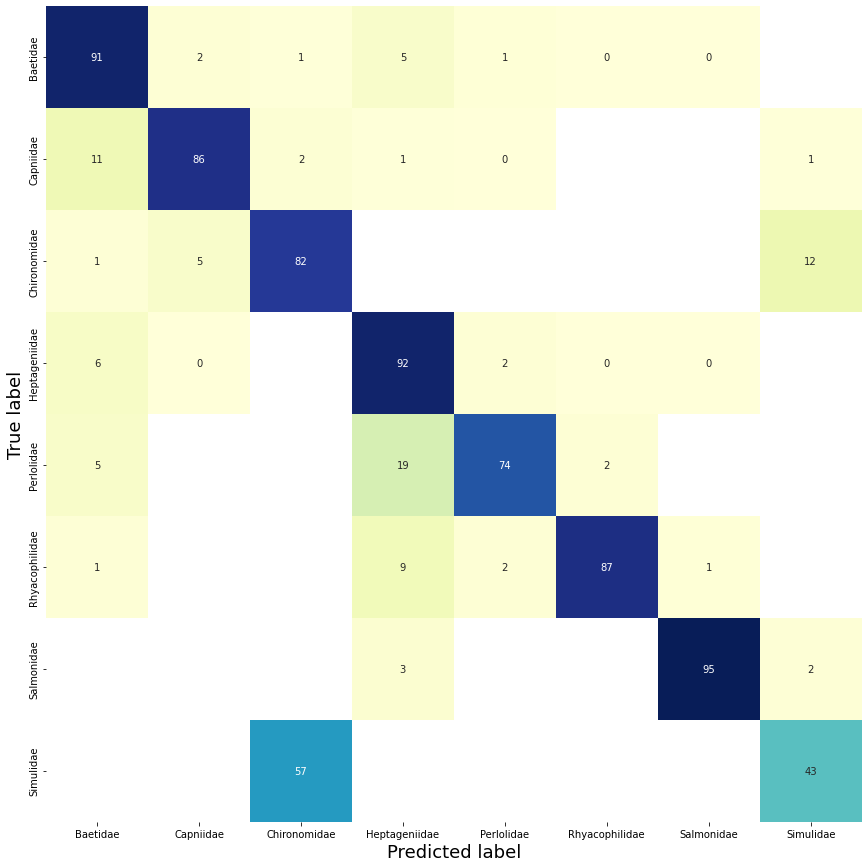

In [137]:
confusion_matrixX(df.y_true, df.y_pred, classes)